<a href="https://colab.research.google.com/github/Nkbhapkar/EDA-on-playstore/blob/main/Capston_1_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

**Exploratory data analysis on Playstore**

The main objective of this project is to deliver insights to understand customer demands better and thus help developers to popularize the product.Now a days playstore contain multiple apps but some are successfull and some of them are unsuccessfull.. This dataset contains details of different applications and reviews from different users.By exploring the data we have analyse the key factors which are responsible for app success.

Exporatory data analysis of playstore involves following steps
1. Loading the data into data frame
2. Cleaning the data
3. Extracting statistics from the dataset
4. Exploratory analysis and visualizations
5. Conclusion




first of all we have to mount drive where it contain dataset of playstore


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import packages 

In [ ]:
# Import the libraries for EDA project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline






**Data Preparation**

It is the process in which finding the missing values,cleaning and transforming raw data prior to processing and analysis. It is a crucial step before processing and sometimes involves reformatting data, making corrections to data and therefore the combining of knowledge sets to complement data.

Loading the dataset and Reading the csv file for further operation 


In [ ]:
ps_df = pd.read_csv('/content/drive/MyDrive/Almabetter/Capston_1/Copy of Play Store Data.csv')
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Checking Number of columns and rows in dataset

In [ ]:
#checking the shape of dataset
ps_df.shape

(10841, 13)

In [ ]:
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
 temp = pd.DataFrame(index=googlestore_df.columns)
    temp['data_type'] = googlestore_df.dtypes
    temp['null_count'] = googlestore_df.isnull().sum()
    temp['unique_count'] = googlestore_df.nunique()
    return temp

IndentationError: ignored

In [ ]:
#now we have to check null values or missing values present in the different columns
def printinfo():
  temp = pd.DataFrame(index=ps_df.columns)
  temp['data_type'] = ps_df.dtypes
  temp['null_count']=ps_df.isnull().sum()
  temp['unique_count'] = ps_df.nunique
  return temp

In [ ]:
printinfo()

,data_type,null_count,unique_count
App,object,0,<bound method DataFrame.nunique of ...
Category,object,0,<bound method DataFrame.nunique of ...
Rating,float64,0,<bound method DataFrame.nunique of ...
Reviews,object,0,<bound method DataFrame.nunique of ...
Size,object,0,<bound method DataFrame.nunique of ...
Installs,object,0,<bound method DataFrame.nunique of ...
Type,object,0,<bound method DataFrame.nunique of ...
Price,float64,0,<bound method DataFrame.nunique of ...
Content Rating,object,0,<bound method DataFrame.nunique of ...
Genres,object,0,<bound method DataFrame.nunique of ...


cheking the different column name in dataset

In [ ]:
ps_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
#checking the unique category in dataset
ps_df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [ ]:
# total unique category
ps_df['Category'].nunique()

33

Finding the Null values in dataset 

In [ ]:
#check null values in dataset
ps_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [ ]:
#checking total null values in dataset
ps_df.isnull().sum().sum()

0

After checking the null values in datset there are the 1487 null values are founded.so that we have drop this null values.

In [ ]:
#Drop the null values from datset
ps_df = ps_df.dropna()

In [ ]:
ps_df.shape #after dropping the null values checking the shape of dataset

(8886, 13)

Checking again null values 

In [ ]:
ps_df.isnull().sum().sum()

0

Total no of Apps in dataset

In [ ]:
#Checking the number of different types of apps
ps_df['App'].nunique()

8190

Descriptive statistics 

In [ ]:
ps_df.describe()

,Rating
count,9360.000000
mean,4.191838
std,0.515263
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


In [ ]:
ps_df.loc[3360]

App               CM Launcher 3D - Theme, Wallpapers, Efficient
Category                                        PERSONALIZATION
Rating                                                      4.6
Reviews                                                 6702776
Size                                                        17M
Installs                                           100,000,000+
Type                                                       Free
Price                                                         0
Content Rating                                             Teen
Genres                                          Personalization
Last Updated                                     August 3, 2018
Current Ver                                              5.41.0
Android Ver                                        4.0.3 and up
Name: 3360, dtype: object

In [ ]:
ps_df['Price'] = pd.to_numeric(ps_df['Price'].str.replace('$',''))
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   float64
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.3+ MB


Now we can see which category contain how many no of apps


In [ ]:
ps_df['Category'].value_counts()

FAMILY                 1746
GAME                   1097
TOOLS                   733
PRODUCTIVITY            351
MEDICAL                 350
COMMUNICATION           328
FINANCE                 323
SPORTS                  319
PHOTOGRAPHY             317
LIFESTYLE               314
PERSONALIZATION         312
BUSINESS                303
HEALTH_AND_FITNESS      297
SOCIAL                  259
SHOPPING                238
NEWS_AND_MAGAZINES      233
TRAVEL_AND_LOCAL        226
DATING                  195
BOOKS_AND_REFERENCE     178
VIDEO_PLAYERS           160
EDUCATION               155
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     124
FOOD_AND_DRINK          109
HOUSE_AND_HOME           76
WEATHER                  75
AUTO_AND_VEHICLES        73
LIBRARIES_AND_DEMO       64
ART_AND_DESIGN           61
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

In [ ]:
y = ps_df['Category'].value_counts().index
x = ps_df['Category'].value_counts()
xsis = []
ysis = []
for i in range(len(x)):
    xsis.append(x[i])
    ysis.append(y[i])

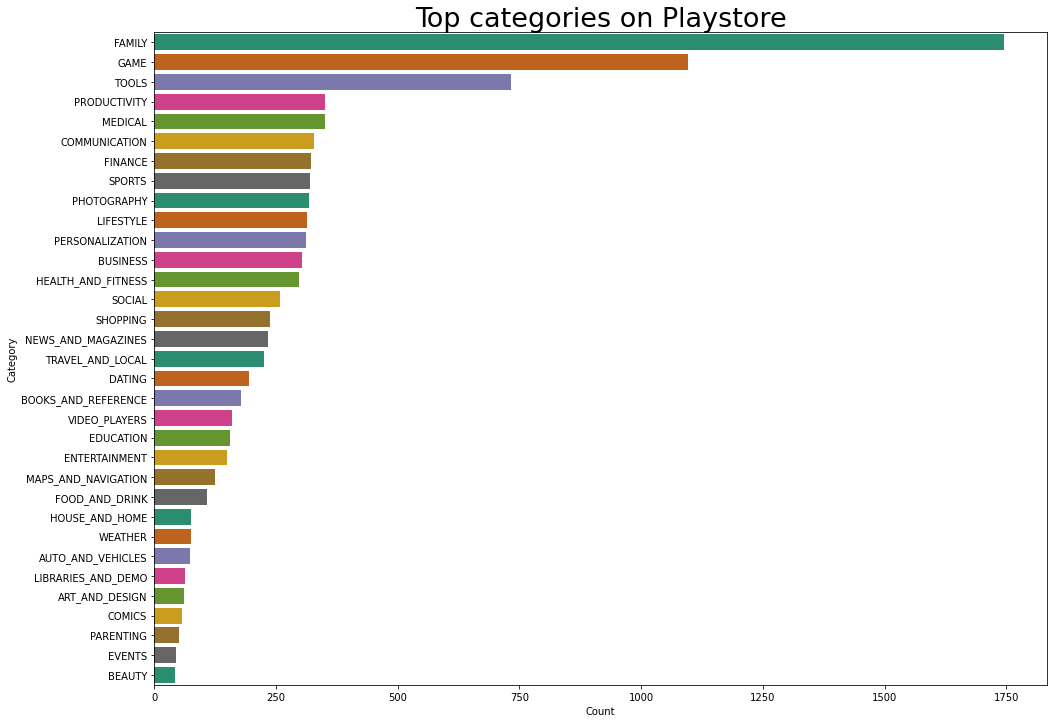

In [ ]:
plt.figure(figsize=(16,12))
plt.xlabel("Count")
plt.ylabel("Category")

graph = sns.barplot(x = xsis, y = ysis, palette= "Dark2")
graph.set_title("Top categories on Playstore", fontsize = 27);

Now we have check if any app have duplicates

In [ ]:
boolean = ps_df['App'].duplicated().any()
boolean

True

In [ ]:
ps_df['App'].value_counts()

ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
ESPN                                                 7
8 Ball Pool                                          7
Duolingo: Learn Languages Free                       7
                                                    ..
Ever After High™ Charmed Style                       1
Masha and Bear: Cooking Dash                         1
Bono’s Pit Bar-B-Q                                   1
EF Financial Control Free                            1
Launcher Oreo 8.1                                    1
Name: App, Length: 8190, dtype: int64

As we can see from the above mentioned data, some of the apps are having multiple rows. Let's check out if there data is identical or not

In [ ]:
ps_df[ps_df['App']=='ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,"100,000,000+",Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,"100,000,000+",Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,"100,000,000+",Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,"100,000,000+",Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,"100,000,000+",Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,"100,000,000+",Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,"100,000,000+",Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,"100,000,000+",Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


As we can see from the above dataframe, ROBLOX app is having identical rows with difference in number of reviews. It may have happened that for the same app, the data has been scraped in different points of time. So we have kept row of an app with maximum number of reviews, assuming it to be the latest one.

In [ ]:
ps_df.drop_duplicates(inplace=True)

Let find out the which genre has maximum number of count 



In [ ]:
sns.set_style('dark')
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (8, 4)
plt.rcParams['figure.facecolor'] = 'white'

In [ ]:
top_genres = ps_df.Genres.value_counts().reset_index().rename(columns={'Genres':'Count','index':'Genres'})

In [ ]:
genres_installs = ps_df.groupby(['Genres'])[['Installs']].sum()
top_genres_installs = pd.merge(top_genres, genres_installs, on='Genres')
top_20_genres_installs = top_genres_installs.head(20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


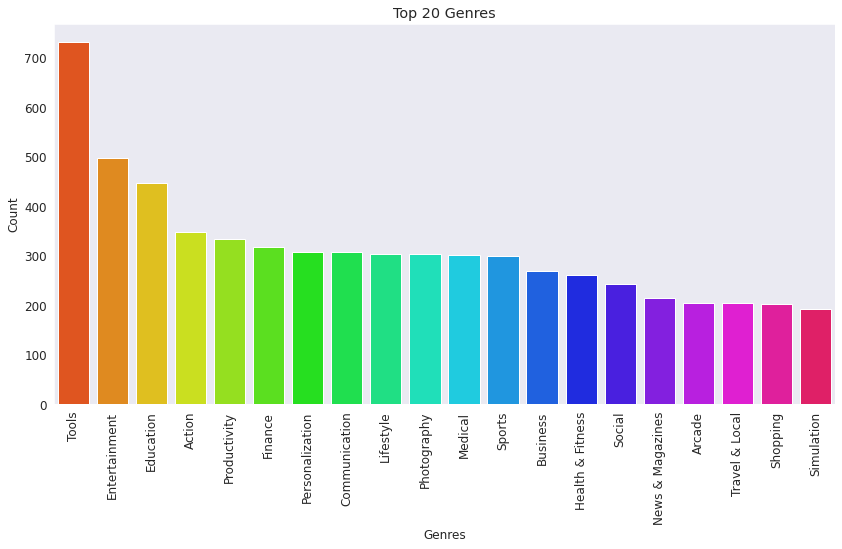

In [ ]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Genres")
plt.ylabel("Number of application")
plt.title("Top 20 Genres")
sns.barplot(top_20_genres_installs.Genres, top_20_genres_installs.Count,palette= "hsv")
plt.show()

# Content rating 

Now we have to look on content rating according to age group.From, this we can easily find out which age group gives rating mostly to the apps on playstore 

In [ ]:
x2 = ps_df['Content Rating'].value_counts().index
x2

Index(['Everyone', 'Teen', 'Mature 17+', 'Everyone 10+', 'Adults only 18+',
       'Unrated'],
      dtype='object')

In [ ]:
y2 = ps_df['Content Rating'].value_counts()
y2

Everyone           7089
Teen               1022
Mature 17+          411
Everyone 10+        360
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

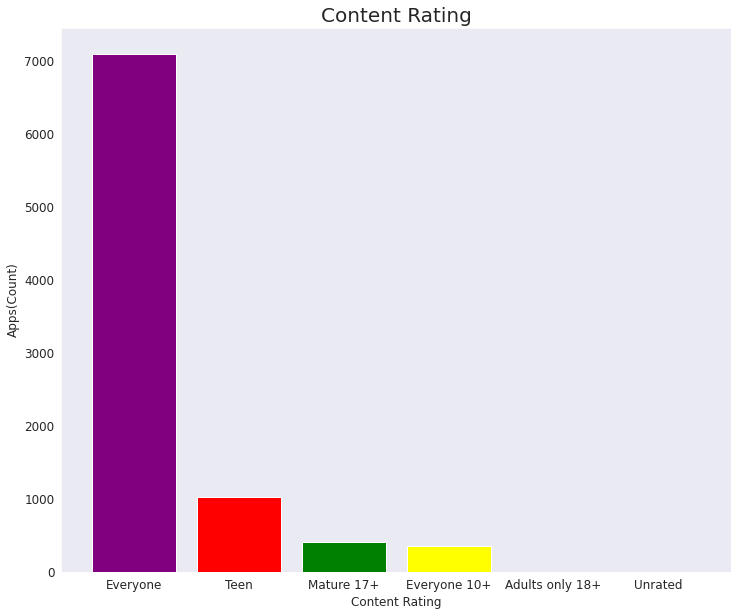

In [ ]:
plt.figure(figsize=(12,10))
plt.bar(x2,y2,width=0.8,color=['purple','red','green','yellow','cyan','blue']);
plt.title('Content Rating',size = 20);
plt.ylabel('Apps(Count)');
plt.xlabel('Content Rating');

from this graph it is easily seen that everyone was gives rating to  apps in playstore, there is no such age group was rated mostly .

Lets have a look on distribution of rating 

In [ ]:
ps_df['Rating'].describe()

count    8886.000000
mean        4.187959
std         0.522428
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

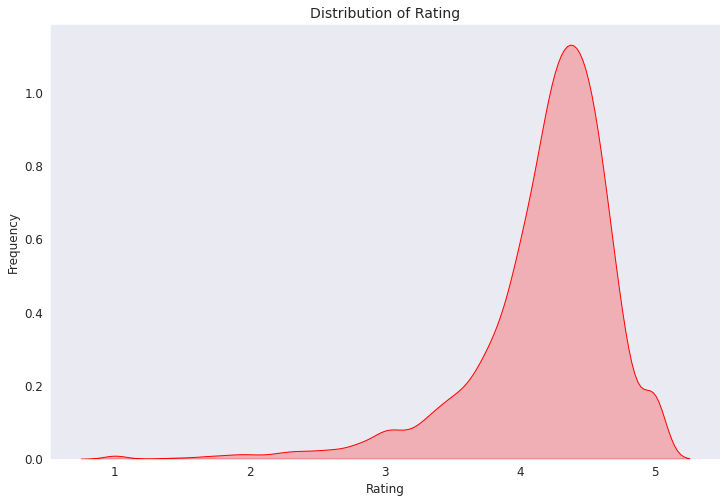

In [ ]:
plt.figure(figsize=(12,8))
graph =  sns.kdeplot(ps_df.Rating, color="red", shade = True)
graph.set_xlabel('Rating')
graph.set_ylabel('Frequency')
plt.title('Distribution of Rating',size = 14)
plt.show()


 From the graph we can conclude that most of rating given are 3.5 to 4.7

we can also differentiate genre according to the ratings like a highest and lowest rating genres

In [ ]:
 genres_ratings_df = ps_df.groupby(['Genres'])[['Rating']].mean()


In [ ]:
genres_installs_ratings = pd.merge(top_genres_installs, genres_ratings_df, on='Genres')


In [ ]:
genres_installs_ratings.sort_values('Rating', ascending= False, inplace=True)


In [ ]:
highest_rated_genres = genres_installs_ratings.iloc[0:20]
lowest_rated_genres = genres_installs_ratings.iloc[-20:]
lowest_rated_genres = lowest_rated_genres[lowest_rated_genres['Rating'].notnull()]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


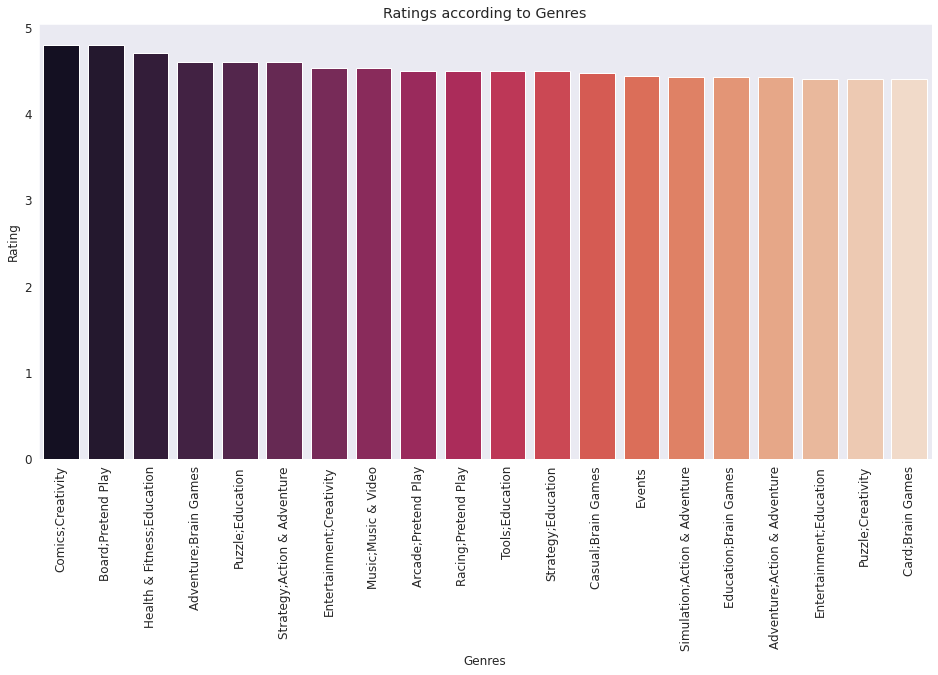

In [ ]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
plt.xlabel("Genres")
plt.ylabel("Rating")
plt.title("Ratings according to Genres")
sns.barplot(highest_rated_genres.Genres, highest_rated_genres.Rating ,palette= "rocket")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


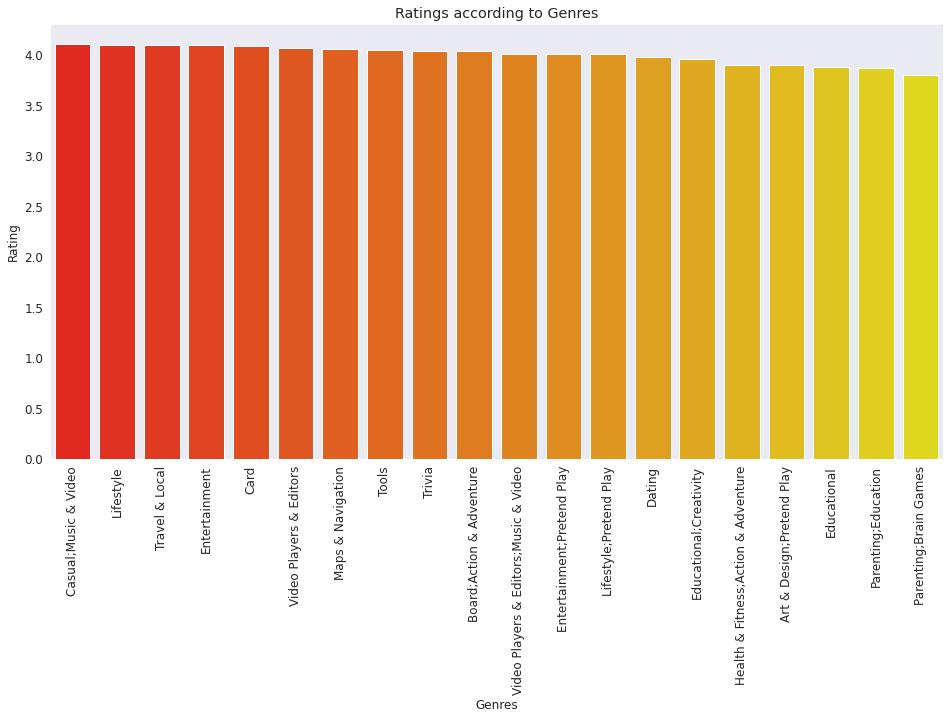

In [ ]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
plt.xlabel("Genres")
plt.ylabel("Rating")
plt.title("Ratings according to Genres")
sns.barplot(lowest_rated_genres.Genres, lowest_rated_genres.Rating ,palette= "autumn")
plt.show()

## Apps which are paid and free analysis
Apps which are free and paid of different category as shown in bar plot 

In [ ]:
ps_df['Type']


0        Free
1        Free
2        Free
3        Free
4        Free
         ... 
10834    Free
10836    Free
10837    Free
10839    Free
10840    Free
Name: Type, Length: 8886, dtype: object

In [ ]:
money_apps = ps_df['Type'].value_counts().index


In [ ]:
ps_df['Type'].value_counts()

Free    8275
Paid     611
Name: Type, dtype: int64

In [ ]:
app_count = ps_df.groupby(['Category','Type'])[['App']].count().reset_index().rename(columns={'App':'Count','index':'App'})


In [ ]:
df_app_count = app_count.pivot('Category', 'Type', 'Count').fillna(0).reset_index()
df_app_count

Type,Category,Free,Paid
0,ART_AND_DESIGN,58.0,3.0
1,AUTO_AND_VEHICLES,72.0,1.0
2,BEAUTY,42.0,0.0
3,BOOKS_AND_REFERENCE,169.0,8.0
4,BUSINESS,261.0,9.0
5,COMICS,58.0,0.0
6,COMMUNICATION,285.0,22.0
7,DATING,155.0,4.0
8,EDUCATION,125.0,4.0
9,ENTERTAINMENT,109.0,2.0


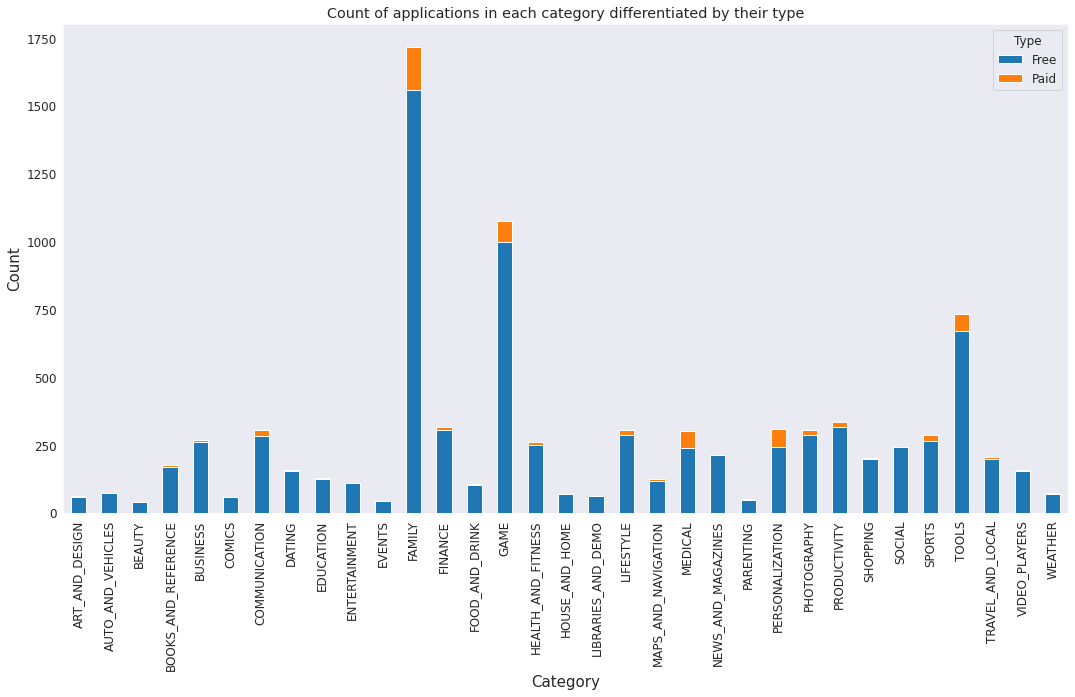

In [ ]:
df_app_count.set_index('Category').plot(kind='bar', stacked=True, figsize=(18,9))
plt.xlabel("Category", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Count of applications in each category differentiated by their type")
plt.show()

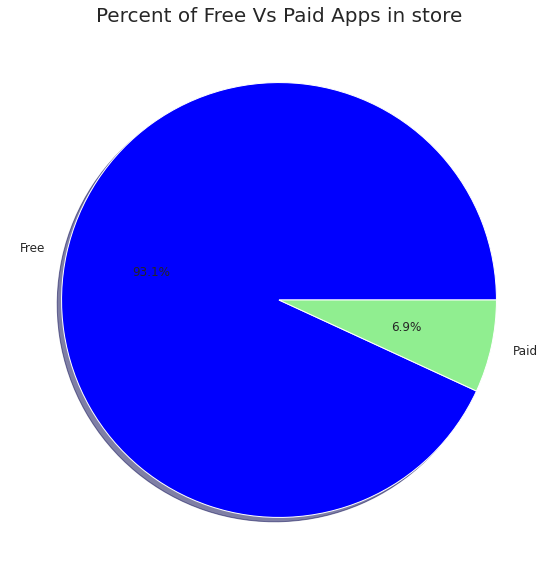

In [ ]:
plt.figure(figsize=(10,10))
labels = ps_df['Type'].value_counts(sort = True).index
sizes = ps_df['Type'].value_counts(sort = True)
colors = ["blue","lightgreen"]

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Percent of Free Vs Paid Apps in store',size = 20)
plt.show()